In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


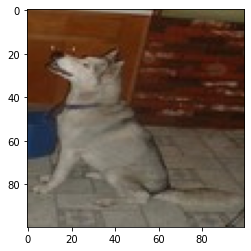

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [9]:
model.fit(X_train, Y_train, epochs = 15, batch_size = 64)


Epoch 1/15
32/32 [==============================] - 10s 249ms/step - loss: 0.7219 - accuracy: 0.5105
Epoch 2/15
32/32 [==============================] - 9s 273ms/step - loss: 0.6639 - accuracy: 0.6070
Epoch 3/15
32/32 [==============================] - 9s 271ms/step - loss: 0.6105 - accuracy: 0.6690
Epoch 4/15
32/32 [==============================] - 9s 284ms/step - loss: 0.5425 - accuracy: 0.7280
Epoch 5/15
32/32 [==============================] - 8s 266ms/step - loss: 0.4742 - accuracy: 0.7655
Epoch 6/15
32/32 [==============================] - 9s 280ms/step - loss: 0.3962 - accuracy: 0.8240
Epoch 7/15
32/32 [==============================] - 9s 268ms/step - loss: 0.3198 - accuracy: 0.8635
Epoch 8/15
32/32 [==============================] - 9s 278ms/step - loss: 0.2365 - accuracy: 0.9085
Epoch 9/15
32/32 [==============================] - 9s 273ms/step - loss: 0.1873 - accuracy: 0.9335
Epoch 10/15
32/32 [==============================] - 9s 275ms/step - loss: 0.1317 - accuracy: 0.961

In [10]:
model.evaluate(X_test, Y_test)


13/13 [==============================] - 1s 52ms/step - loss: 1.2970 - accuracy: 0.7075


[1.2969964742660522, 0.7074999809265137]

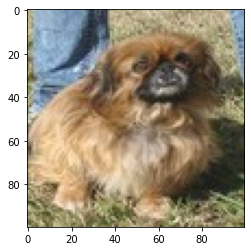

1/1 [==============================] - 0s 83ms/step
Our model says it is a : dog


In [11]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)